In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-03-01 22:00:47.734327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Load your data
df = pd.read_csv('sorted_ntc.csv')  # Replace with your file
print(df.head())


   S.N.        Date    Open    High     Low     Ltp  % Change       Qty  \
0  1000  2020-12-01  1071.0  1178.0  1050.0  1175.0      9.71  394837.0   
1   999  2020-12-02  1200.0  1292.0  1200.0  1292.0      9.96  317622.0   
2   998  2020-12-03  1292.0  1387.0  1252.0  1285.0     -0.54  326989.0   
3   997  2020-12-06  1285.0  1285.0  1157.0  1157.0     -9.96  263094.0   
4   996  2020-12-07  1167.0  1220.0  1111.0  1219.0      5.36  288231.0   

      Turnover  
0  443650399.0  
1  407173587.0  
2  421838899.0  
3  321097250.0  
4  337433718.0  


In [ ]:
# df.tail(50)

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
950,50,2024-12-10,968.5,968.5,950.0,955.0,0.12,10810.0,10339167.5
951,49,2024-12-11,969.0,969.0,951.0,961.9,0.72,15840.0,15136660.3
952,48,2024-12-12,970.0,970.0,950.0,950.0,-1.24,15518.0,14805206.6
953,47,2024-12-16,969.0,969.0,937.9,942.0,-0.84,23470.0,22116807.5
954,46,2024-12-17,945.0,949.9,937.0,946.0,0.42,12083.0,11415648.2
955,45,2024-12-18,946.0,952.0,940.0,942.0,-0.42,13557.0,12790791.3
956,44,2024-12-19,942.0,950.0,930.0,937.0,-0.53,23427.0,21860665.2
957,43,2024-12-22,955.7,973.0,942.0,943.0,0.64,41267.0,39170901.8
958,42,2024-12-23,945.0,954.0,925.0,942.2,-0.08,19818.0,18662075.5
959,41,2024-12-24,939.0,952.0,939.0,943.0,0.08,15851.0,15021487.5


In [4]:
# Ensure all 6 columns are present (adjust if needed)
feature_columns = ['Open', 'High', 'Low', 'Ltp', '% Change', 'Qty']  # Your 8 features
data = df[feature_columns].values

In [5]:
# Scale all 8 features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Sequence creation function
def create_sequences_multivariate(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])   # n_steps timesteps, each with 8 features
        y.append(data[i+n_steps])      # Predict all 8 features at next step
    return np.array(X), np.array(y)

In [7]:
# Parameters
n_steps = 60  # Past 60 days used for prediction


In [8]:
# Create sequences
X_test, y_test = create_sequences_multivariate(scaled_data, n_steps)

In [9]:
model = load_model('final_model_60_noEps.keras')

In [10]:
## for the X_test
test_result=model.predict(X_test)
test_result_inverse=scaler.inverse_transform(test_result)
test_result_close=test_result_inverse[:, 3]


30/30 [==============================] - 2s 29ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
print("MAE of close:", mean_absolute_error(y_test[:,3], test_result[:,3]))
print("R² Score of close:", r2_score(y_test[:,3], test_result[:,3]))
print("MSE of close:", mean_squared_error(y_test[:,3], test_result[:,3]))



MAE of close: 0.03671025823674749
R² Score of close: 0.9385225302410289
MSE of close: 0.002777837039144496


In [ ]:
print("MAE of Test:", mean_absolute_error(y_test, test_result))
print("R² Score TESt:", r2_score(y_test, test_result))
print("MSE TESt:", mean_squared_error(y_test, test_result))


MAE of Test: 0.047802831313570306
R² Score TESt: 0.6437244195933292
MSE TESt: 0.005478550929053937


In [13]:
# Function to predict future days recursively (all 8 features)
def predict_future_multivariate(model, data, scaler, n_steps, future_days):
    predicted = []
    current_sequence = data[-n_steps:]  # Last window of data

    for _ in range(future_days):
        prediction = model.predict(current_sequence.reshape(1, n_steps, 6), verbose=0)
        predicted.append(prediction[0])

        # Append predicted row to current sequence for next prediction
        current_sequence = np.vstack([current_sequence[1:], prediction])

    # Inverse transform all predicted data (8 features)
    predicted_array = np.array(predicted)
    predicted_prices = scaler.inverse_transform(predicted_array)
    return predicted_prices

In [14]:
# Predict next 30 days
future_days = 50
future_prices = predict_future_multivariate(model, scaled_data, scaler, n_steps, future_days)

In [15]:
# Plot actual vs future Close prices
actual_close_prices = df['Ltp'].values

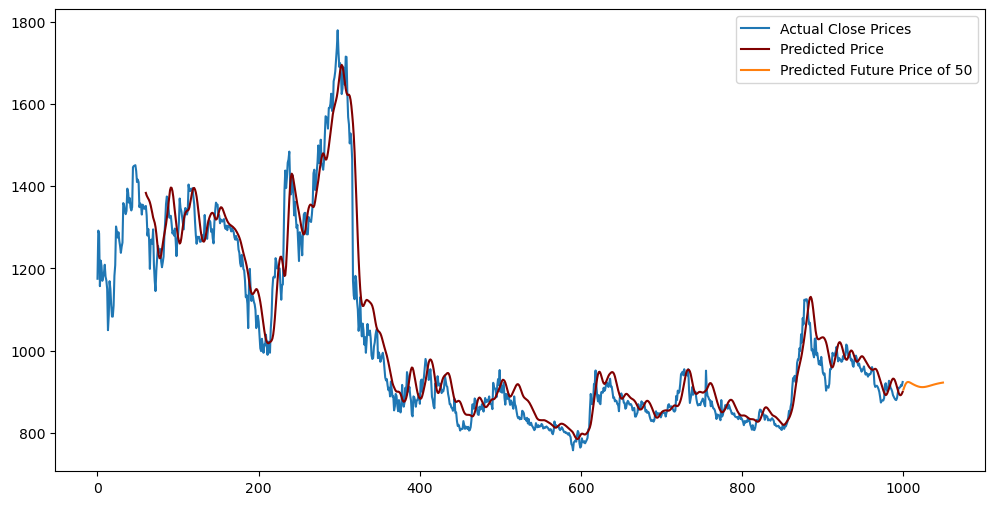

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(actual_close_prices, label='Actual Close Prices')
plt.plot(range(n_steps,len(test_result_close)+n_steps), test_result_close, label="Predicted Price", color="maroon")
plt.plot(range(len(actual_close_prices), len(actual_close_prices)+future_days),future_prices[:,3], label=f"Predicted Future Price of {future_days}")
# plt.plot(df["Date"])
plt.legend()
plt.savefig("NTC_future.png")

In [ ]:
# Print predicted future prices (all features for each day)
future_df = pd.DataFrame(future_prices, columns=feature_columns)
print(future_df)

          Open        High         Low         Ltp  % Change           Qty
0   903.388489  922.536377  910.937439  905.639709 -0.765711  24476.804688
1   908.970703  928.505127  916.248291  911.383789 -0.743736  26251.810547
2   913.851929  933.593140  920.799500  916.400513 -0.727946  27778.074219
3   917.536621  937.315063  924.158752  920.189026 -0.720118  28919.496094
4   919.883057  939.577698  926.243042  922.615723 -0.720293  29640.113281
5   921.013306  940.562805  927.211487  923.812927 -0.727279  29976.529297
6   921.180542  940.572510  927.330688  924.039917 -0.739461  30004.708984
7   920.684143  939.938721  926.890930  923.596375 -0.754926  29814.173828
8   919.801025  938.954590  926.143311  922.753906 -0.771800  29485.378906
9   918.742065  937.832703  925.268738  921.716614 -0.788553  29083.332031
10  917.640320  936.698242  924.371277  920.610779 -0.804195  28651.736328
11  916.573975  935.619263  923.505981  919.511353 -0.817964  28219.390625
12  915.576538  934.61926

In [18]:
# Save to CSV if needed
future_df.to_csv('NTC_predicted_future_prices.csv', index=False)